In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report
from sklearn.datasets import load_digits


# For deep learning
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import to_categorical

In [2]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Load Digits dataset for classification
digits = load_digits()
X_digits = digits.data
y_digits = digits.target
# To track the splits so that analysis of errors can be done.
indices = np.arange(X_digits.shape[0]) 

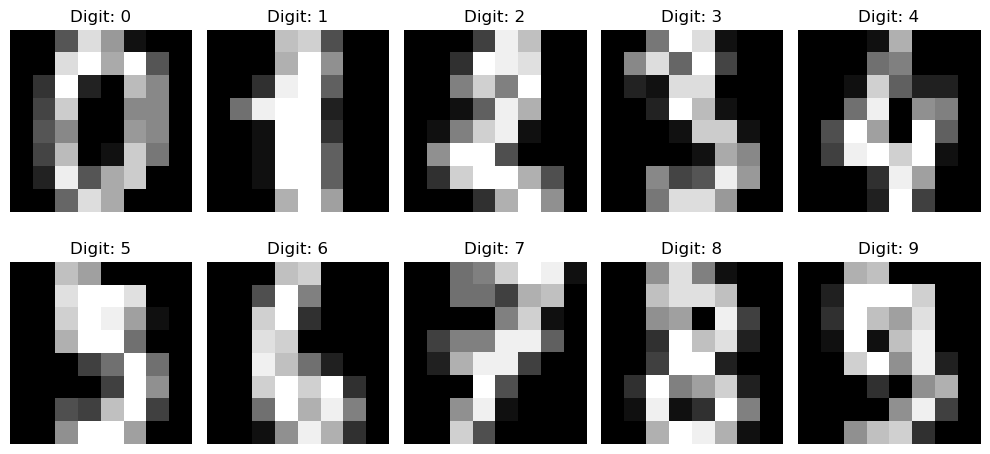

Digits dataset: 1797 samples, 64 features


In [4]:
# Display sample digits
plt.figure(figsize=(10, 5))
for i in range(10):
   plt.subplot(2, 5, i+1)
   plt.imshow(digits.images[i], cmap='gray')
   plt.title(f'Digit: {digits.target[i]}')
   plt.axis('off')
plt.tight_layout()
plt.show()


# Print information about dataset
print(f"Digits dataset: {X_digits.shape[0]} samples, {X_digits.shape[1]} features")

What does a single observation look like?

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

Class Balance?

In [7]:
pd.Series(digits.target).value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

# Prepare & Split the Data: 

Load the digits dataset (or a similar image-based dataset).

Scale or normalize features as needed (e.g., pixels in the range [0,1]) and split into training and testing sets.

In [8]:
X_digits = X_digits / 16 # To scale the pixels to 0-1.

In [9]:
X_train, X_test, y_train, y_test,idx_train,idx_test = train_test_split(X_digits, y_digits,indices, test_size=0.2,random_state=42)

# Build & Train an MLP:

Create a sequential model with hidden layers of reasonable size (e.g., 128, 64 units).

Use an activation function (relu, tanh, or sigmoid) and monitor validation accuracy to see which yields the best result.

We will use relu activation functions for all the hidden layers as is practice.  Since we are dealing with a multi-class problem, the output layer is ten wide with a softmax activation function.

In [10]:
model = tf.keras.Sequential([
    layers.Input(shape = (X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


Choice of compiler is pretty straight forward.

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3477 - loss: 2.0860 - val_accuracy: 0.8194 - val_loss: 1.2259
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.8399 - loss: 0.9699 - val_accuracy: 0.8889 - val_loss: 0.4847
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.9246 - loss: 0.4247 - val_accuracy: 0.9111 - val_loss: 0.2948
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.9464 - loss: 0.2675 - val_accuracy: 0.9333 - val_loss: 0.2190
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.9591 - loss: 0.2026 - val_accuracy: 0.9389 - val_loss: 0.1771
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.9651 - loss: 0.1643 - val_accuracy: 0.9556 - val_loss: 0.1527
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.9709 - loss: 0.1377 - val_accuracy: 0.9667 - val_loss: 0.1377
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.9758 - loss: 0.1173 - val_accuracy: 0.96

# Model Evaluation & Improvement:

Evaluate final accuracy or compute confusion matrices for classification.

Experiment with alternative hyperparameters, additional layers, or different optimizers to see how each change impacts performance.

In [12]:
predictions = model.predict(X_test).argmax(axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.9722222222222222


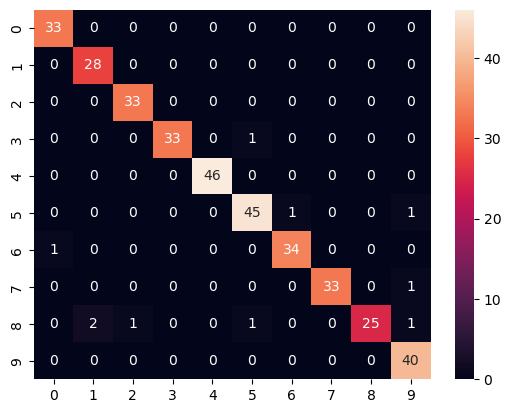

In [13]:
print(accuracy_score(y_test,predictions))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.9825 - loss: 0.0887
Validation Accuracy: 97.22%


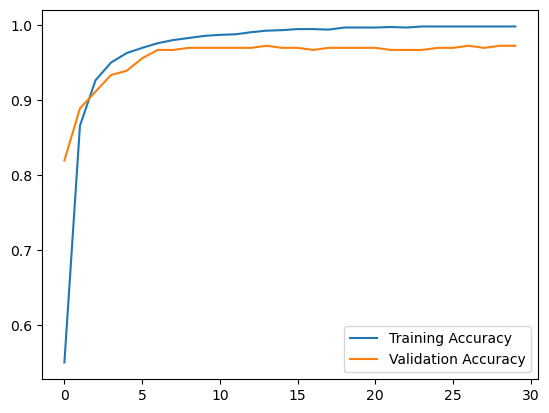

In [14]:
val_loss, val_accuracy = model.evaluate(X_test, y_test)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

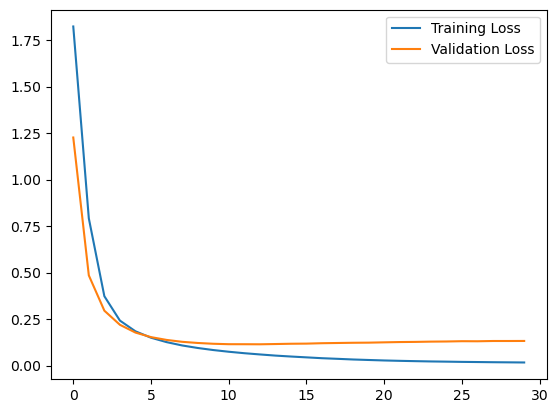

In [15]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

It is difficult to be too worried about overfitting given these plots and the fact that my accuracy score is so high on the unseen data.  Let's introduce some architecture anyways and see what happens. Specifically, introduce batch normalization and a random dropout.

In [16]:
model2 = tf.keras.Sequential([
    layers.Input(shape = (X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [17]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3140 - loss: 2.0093 - val_accuracy: 0.6611 - val_loss: 1.5640
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.8548 - loss: 0.6860 - val_accuracy: 0.8861 - val_loss: 0.7680
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.9052 - loss: 0.3553 - val_accuracy: 0.9194 - val_loss: 0.3989
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.9418 - loss: 0.2053 - val_accuracy: 0.9389 - val_loss: 0.2371
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.9513 - loss: 0.1709 - val_accuracy: 0.9667 - val_loss: 0.1558
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.9627 - loss: 0.1388 - val_accuracy: 0.9722 - val_loss: 0.1222
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.9726 - loss: 0.1064 - val_accuracy: 0.9750 - val_loss: 0.1100
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.9741 - loss: 0.0777 - val_accuracy: 0.97

In [18]:
predictions = model2.predict(X_test).argmax(axis=1)
print(accuracy_score(y_test,predictions))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
0.9888888888888889


In [19]:
val_loss, val_accuracy = model2.evaluate(X_test, y_test)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.9925 - loss: 0.0647
Validation Accuracy: 98.89%


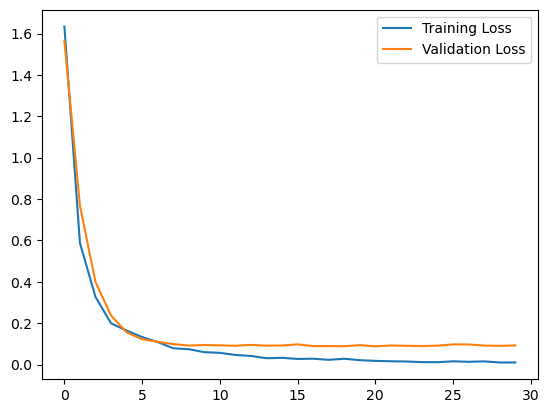

In [20]:
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

We actually improved the performance a bit and the validation loss takes longer to decouple from training and plateau.  So an improvement over the original model and it did not require that much more computational resources.